Problem 1:

a. What kind of company is Home Credit?

Home credit is a credit company, that provide loans to individuals who are excluded from accessing loans due to lack of credit history.This is done by predicting their clients payment ability. 

b. What do you predict in this competition?

This competition is aimed at developing a machine learning algorithm/model to help predict  clients' repayment abilities, thus, increasing finincial inclusion to the population affected by lack of credit histories.

c. What are the benefits companies can gain by predicting this?

some of the benefits to derive from  predicting the payment ability of clients are as follows;

i.Reduced chances of unrecovered or bad debt.

ii. Increased patronage from population rejected by others who require substantial evidence of credit history.

iii. Increased income from increased client base.

Problem 2: Understanding the overview of the data

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msm

In [11]:
#Obtaining  data

import pandas as pd
    
path = 'application_train.csv'

# Read the CSV file using Pandas
data = pd.read_csv(path)

# Display the first few rows of the dataframe to verify it was read correctly
data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

In [18]:
#description of dataset, showing the count, mean, standard deviation, et. of the dataset.
data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [22]:

#checking for missing values
missing = data.isnull().sum()

print(missing.head(50))

SK_ID_CURR                          0
TARGET                              0
NAME_CONTRACT_TYPE                  0
CODE_GENDER                         0
FLAG_OWN_CAR                        0
FLAG_OWN_REALTY                     0
CNT_CHILDREN                        0
AMT_INCOME_TOTAL                    0
AMT_CREDIT                          0
AMT_ANNUITY                        12
AMT_GOODS_PRICE                   278
NAME_TYPE_SUITE                  1292
NAME_INCOME_TYPE                    0
NAME_EDUCATION_TYPE                 0
NAME_FAMILY_STATUS                  0
NAME_HOUSING_TYPE                   0
REGION_POPULATION_RELATIVE          0
DAYS_BIRTH                          0
DAYS_EMPLOYED                       0
DAYS_REGISTRATION                   0
DAYS_ID_PUBLISH                     0
OWN_CAR_AGE                    202929
FLAG_MOBIL                          0
FLAG_EMP_PHONE                      0
FLAG_WORK_PHONE                     0
FLAG_CONT_MOBILE                    0
FLAG_PHONE  

<Axes: >

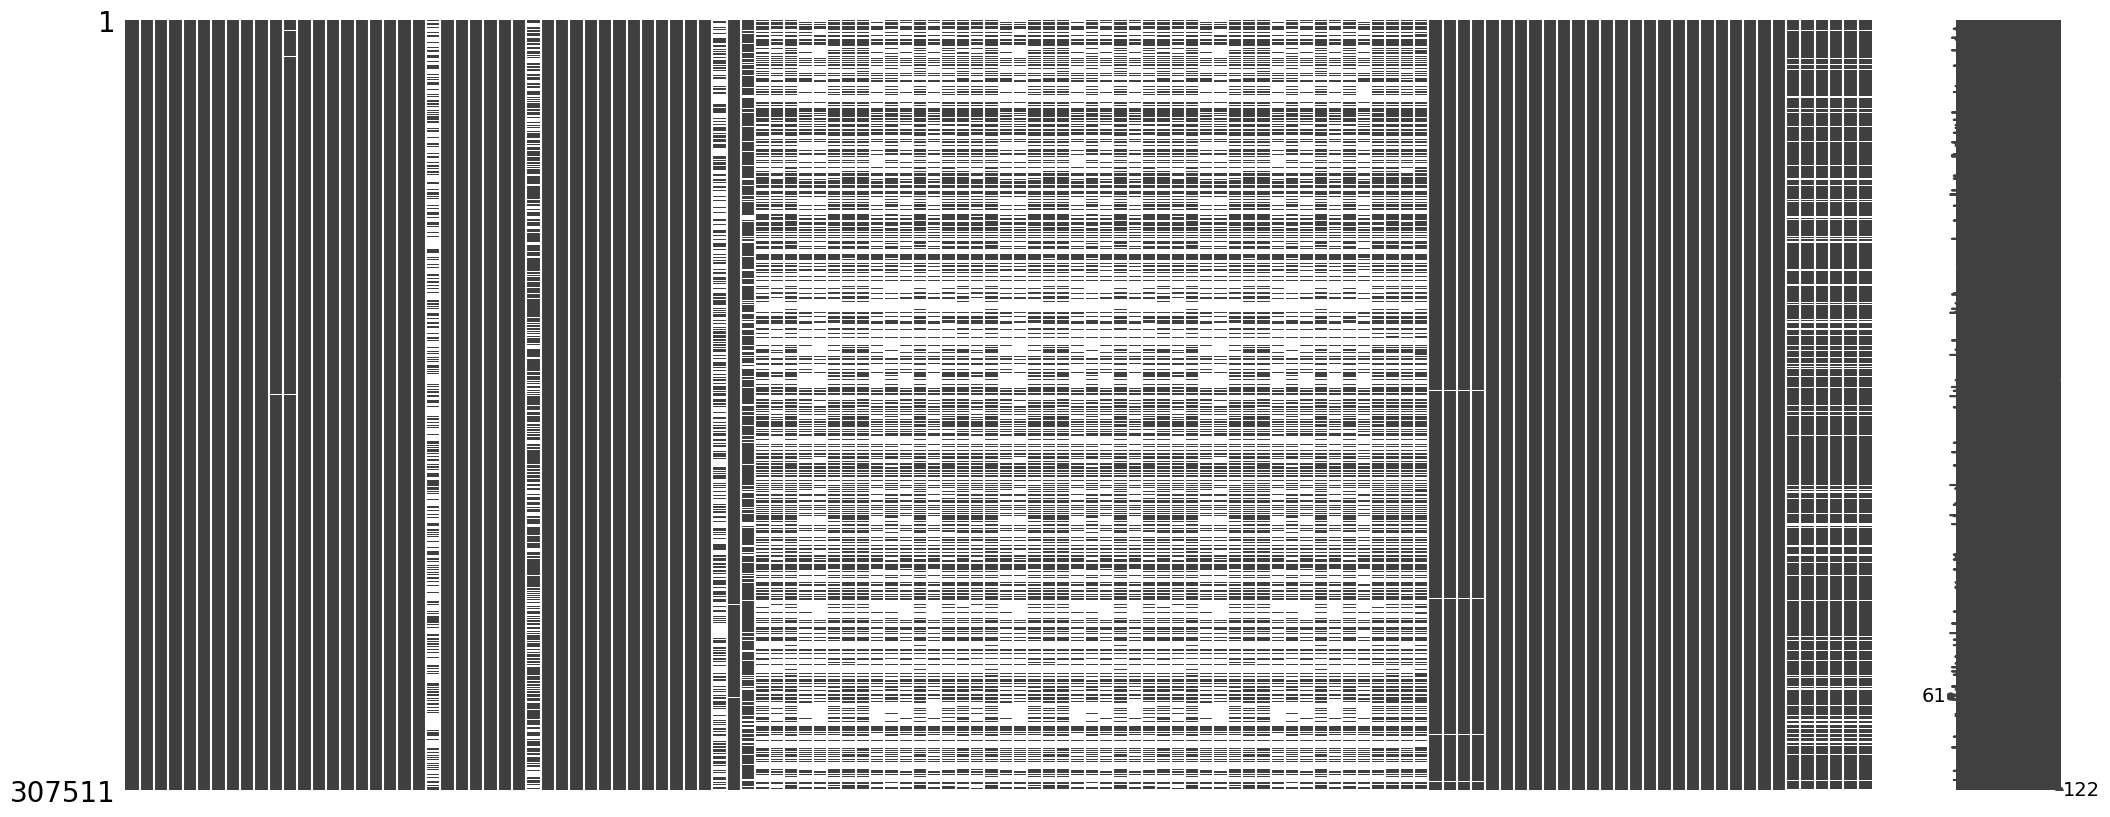

In [23]:
msm.matrix(data)

The missingno library helps to create  a matrix representing the fullness of each column. This makes it easy to identify features with null values.

Text(0.5, 0.98, 'Missing features (percent)')

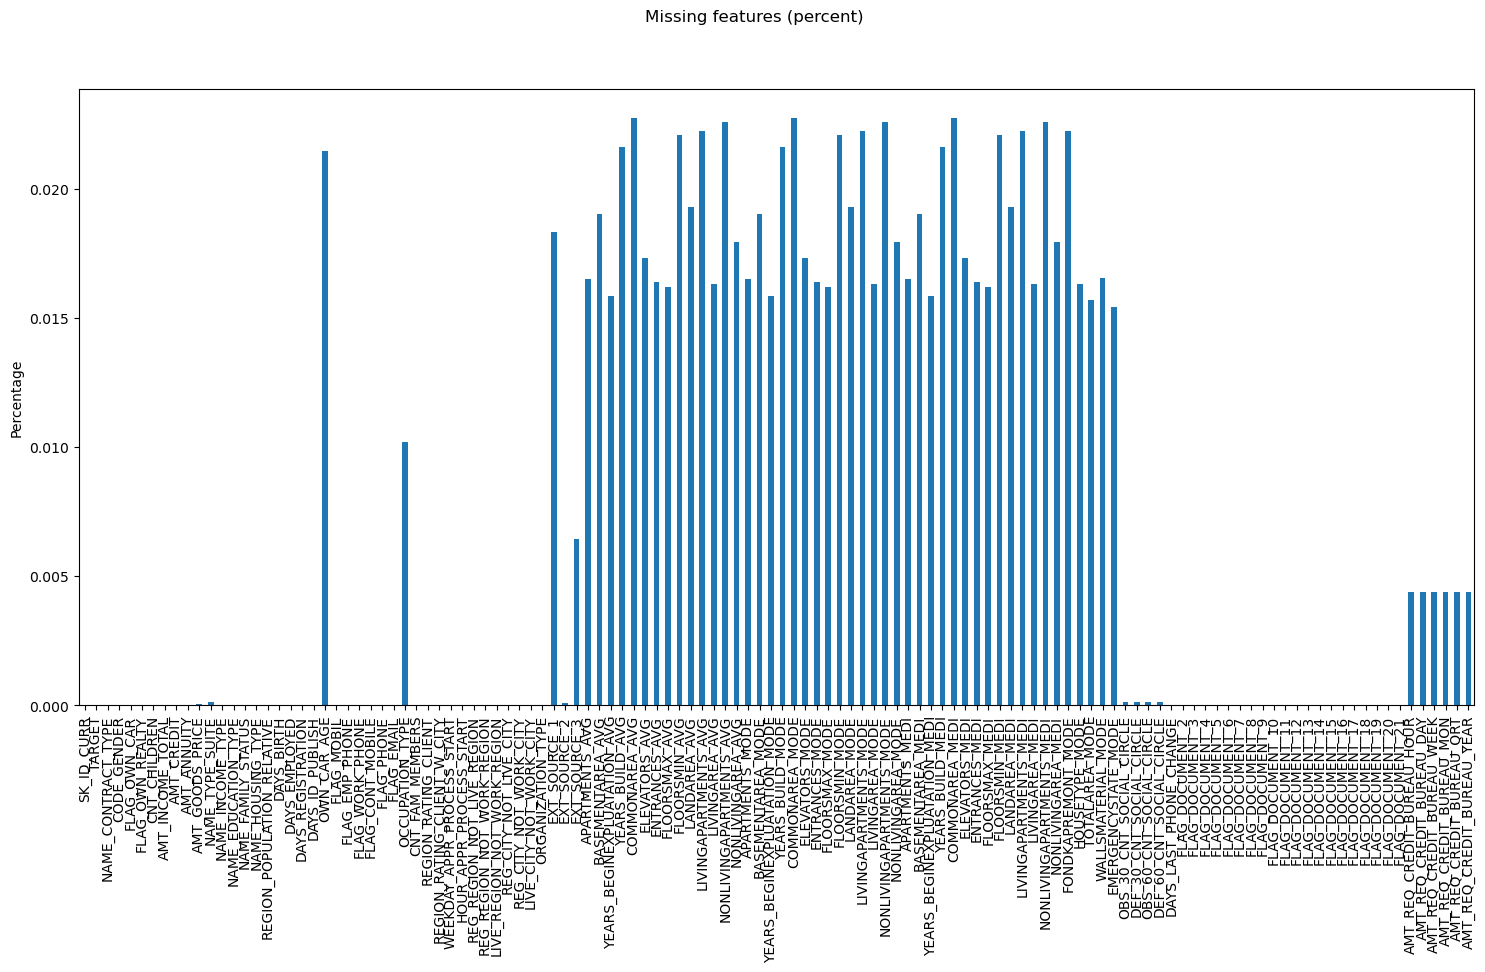

In [25]:

length = len(data) #number of rows in each feature
missing = (missing/ length) *100
 
# graphical representation
fig = plt.figure(figsize=(18, 8))
ax = fig.gca()
missing.plot.bar(ax=ax)
ax.set_ylabel("Percentage")
fig.suptitle("Missing features (percent)")



This graph  shows the percentage of missing values in each feature of the dataset

Problem 3: Multiple issues/questions 

What types of loans did clients collect?

What are the attributes with the most association?

What is the gender ratio of loan application and that of successful repayment?

What is the education level of clients?


Attributes with the most association 

In [26]:
# droping features that contain more than 10% of missing values

large_missing_features = missing[missing.round() > 5].index

data.drop(large_missing_features, axis=1, inplace=True)

data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


<Axes: >

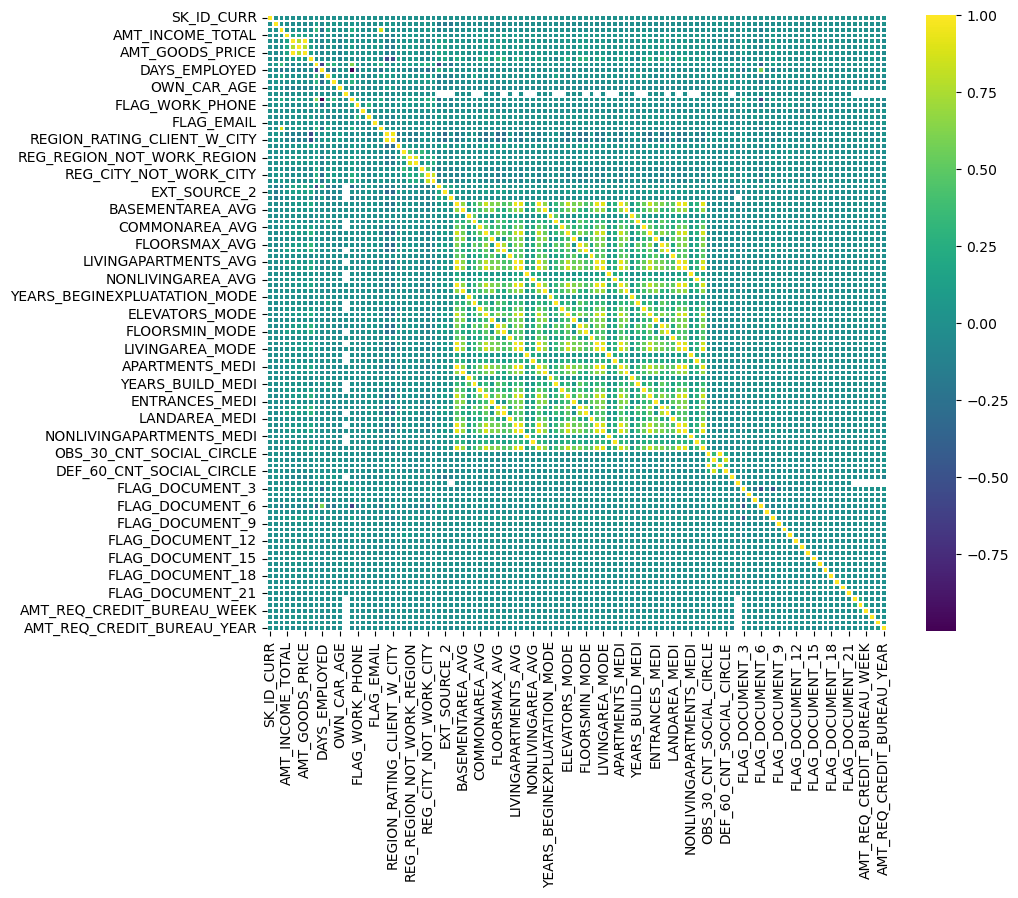

In [29]:
#Finding the correlation matrix of the dataset

import seaborn as sns
corr = data.corr(numeric_only=True)

plt.figure(figsize=(10, 8))
sns.heatmap(corr, cmap="viridis", linecolor="white", linewidths=0.2)
     

<Axes: >

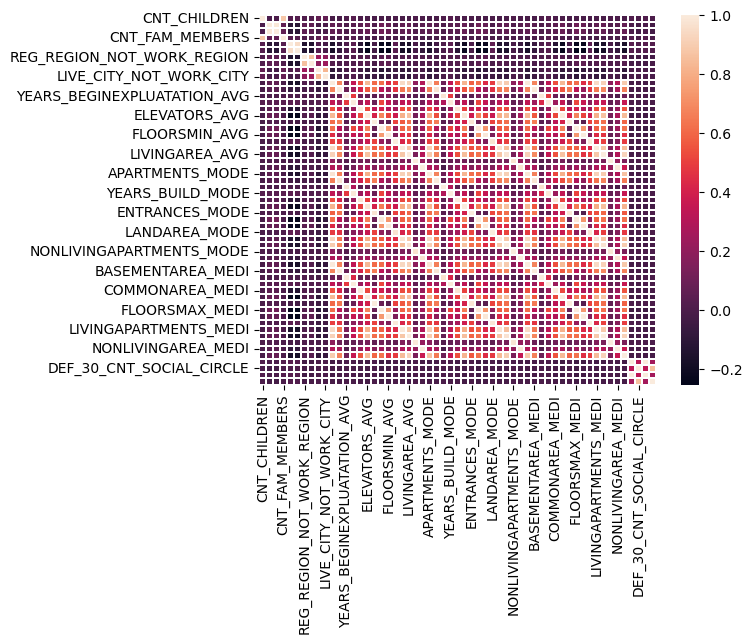

In [31]:
#indentifying features with the most correlation, these would be potentially useful for a regression analysis
def getInterest(df, threshold=0.4):
  """Gets features with the highest correlation"""
  corr = df.corr(numeric_only=True)
  corr.apply(np.abs)
  x = corr >= threshold
  y = corr < 1
  c = x*y
  null_features = corr[c].isna().all()
  #getting features with correlation index greater than or equals to 0.4
  interest = []
  for x in null_features.index:
    if null_features[x] == False:
      interest.append(x)
  return interest

interest = getInterest(data, 0.8)
#correlation of interested features
interest_corr = data[interest].corr()
sns.heatmap(interest_corr, linecolor="white", linewidths=0.2)

In [32]:

factors = getInterest(data[interest], 0.85)

print(f"Features with the most association include \n \r{factors}")


Features with the most association include 
['CNT_CHILDREN', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI

Gender ratio of loan application and ratio of successful repayment

Text(0.5, 0.98, 'Male to female loan relationship')

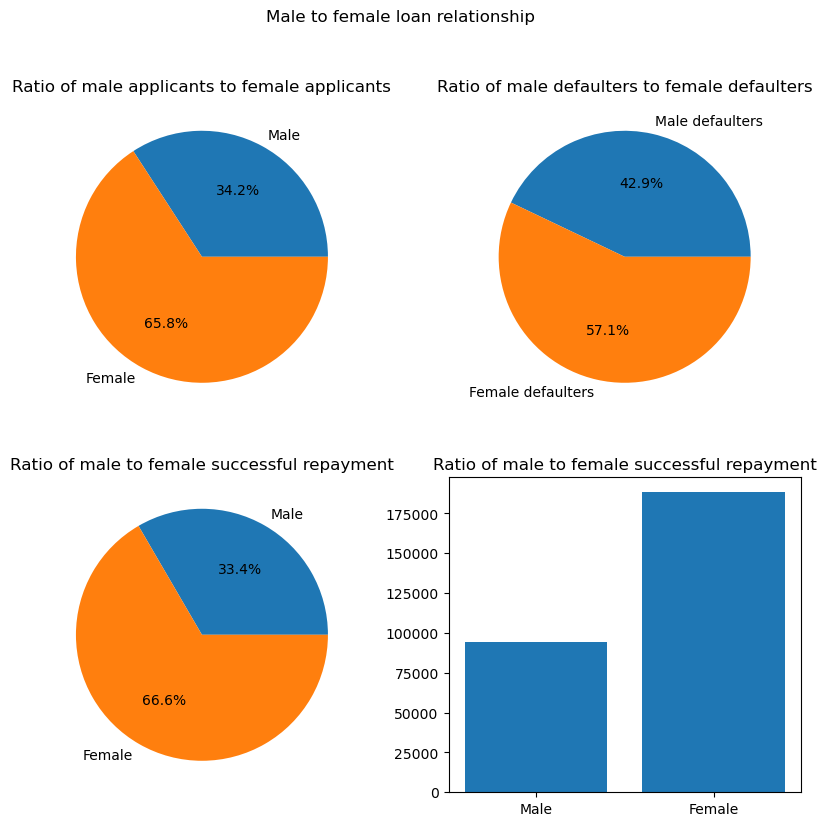

In [33]:
data.head()

male =data.query("CODE_GENDER == 'M'")
female = data.query("CODE_GENDER == 'F'")

male_applicants = male["CODE_GENDER"].count()
female_applicants = female["CODE_GENDER"].count()
total = male_applicants + female_applicants

male_default = male.query("TARGET == 1")["CODE_GENDER"].count()
female_default = female.query("TARGET == 1")["CODE_GENDER"].count()

fig, ax = plt.subplots(2, 2, figsize=(10, 9))

ax[0, 0].pie((male_applicants, female_applicants), labels=["Male", "Female"], autopct='%1.1f%%')
ax[0, 0].set_title("Ratio of male applicants to female applicants")

ax[0, 1].pie((male_default, female_default), labels=["Male defaulters", "Female defaulters"], autopct='%1.1f%%')
ax[0, 1].set_title("Ratio of male defaulters to female defaulters")

ax[1, 0].pie( (male_applicants - male_default, female_applicants - female_default), labels=["Male", "Female"], autopct='%1.1f%%')
ax[1, 0].set_title("Ratio of male to female successful repayment")

ax[1, 1].bar(["Male", "Female"],(male_applicants - male_default, female_applicants - female_default) )
ax[1, 1].set_title("Ratio of male to female successful repayment")

fig.suptitle("Male to female loan relationship")

This shows that;

-Women took more loans than men.

-The men failed to repay their loans more than women.

In [35]:
data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


Type of loan collected by clients

Text(0.5, 1.0, 'Loan types collected by clients')

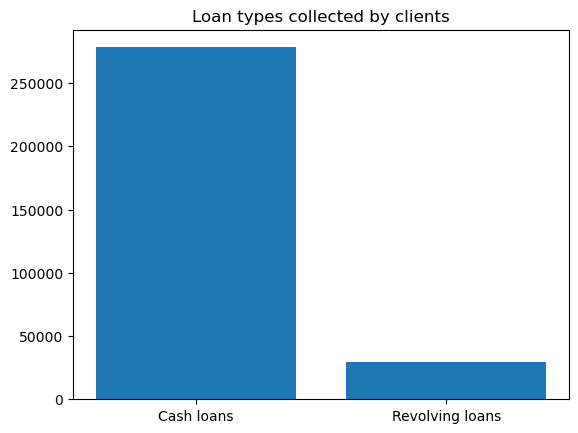

In [36]:
# type of loan collected by clients

loan_type = list(set(data['NAME_CONTRACT_TYPE']))

contracts = dict()
#determine the number of clients that take each type of loan
for loan in loan_type:
  contracts[loan] =data.query(f"NAME_CONTRACT_TYPE == '{loan}'")["NAME_CONTRACT_TYPE"].count()



plt.bar(contracts.keys(), contracts.values())
plt.title("Loan types collected by clients")


Clients seem to have preffered cash loans to Revolving loans

Clients' level of education

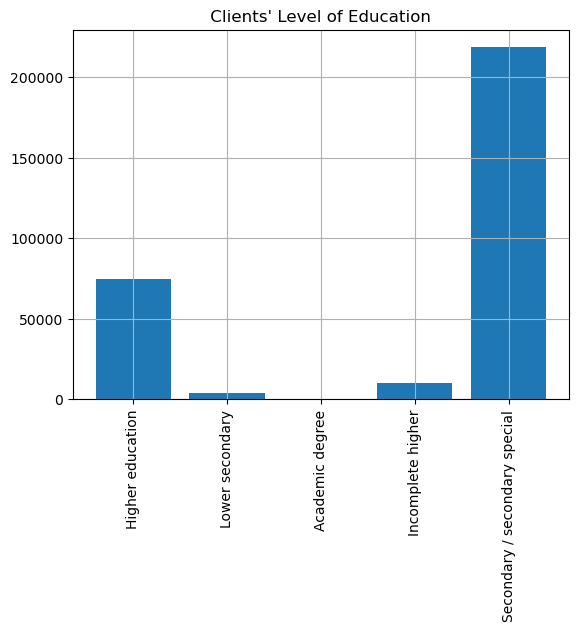

In [38]:
education_types = list(set(data['NAME_EDUCATION_TYPE']))

education = dict()
#determine the number of clients that take each type of loan
for edu in education_types:
  education[edu] = data.query(f"NAME_EDUCATION_TYPE == '{edu}'")["NAME_EDUCATION_TYPE"].count()


plt.bar(education.keys(), education.values())
plt.grid(True)
plt.xticks(rotation="vertical")
plt.title(" Clients' Level of Education ")
plt.show()

    Majority of clients are educated with at least lower secondary certificates.